# Email spam detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sms_spam.csv")

In [3]:
df

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...
...,...,...
5554,ham,You are a great role model. You are giving so ...
5555,ham,"Awesome, I remember the last time we got someb..."
5556,spam,"If you don't, your prize will go to another cu..."
5557,spam,"SMS. ac JSco: Energy is high, but u may not kn..."


# 1). Cleaning

In [9]:
df.shape

(5156, 2)

In [10]:
df.isnull().sum()

type    0
text    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df = df.drop_duplicates()

In [13]:
df.shape

(5156, 2)

# 2). Exploratory Data Analysis (EDA)

In [14]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [15]:
df['type'].value_counts()

type
ham     4503
spam     653
Name: count, dtype: int64

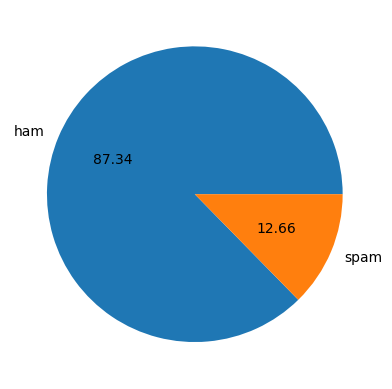

In [16]:
plt.pie(df['type'].value_counts() , labels = ['ham','spam'] , autopct = '%0.2f')
plt.show()

In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Suman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
df['num_character'] = df['text'].apply(len)

In [19]:
df.head()

,type,text,num_character
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


In [20]:
df['num_word'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))

In [21]:
df.head()

,type,text,num_character,num_word
0,ham,Hope you are having a good week. Just checking in,49,11
1,ham,K..give back my thanks.,23,7
2,ham,Am also doing in cbe only. But have to pay.,43,12
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,spam,okmail: Dear Dave this is your final notice to...,161,32


In [22]:
df['num_sentence'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,type,text,num_character,num_word,num_sentence
0,ham,Hope you are having a good week. Just checking in,49,11,2
1,ham,K..give back my thanks.,23,7,1
2,ham,Am also doing in cbe only. But have to pay.,43,12,2
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,spam,okmail: Dear Dave this is your final notice to...,161,32,3


In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
encoder = LabelEncoder()

In [26]:
df['type'] = encoder.fit_transform(df['type'])

In [27]:
df

,type,text,num_character,num_word,num_sentence
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3
...,...,...,...,...,...
5554,0,You are a great role model. You are giving so ...,245,61,4
5555,0,"Awesome, I remember the last time we got someb...",88,19,1
5556,1,"If you don't, your prize will go to another cu...",145,32,2
5557,1,"SMS. ac JSco: Energy is high, but u may not kn...",154,36,7


In [28]:
df.head()

,type,text,num_character,num_word,num_sentence
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,7,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,32,3


In [29]:
df[['num_character' , 'num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,5156.000000,5156.000000,5156.000000
mean,78.658844,18.174166,1.974011
std,57.615904,12.756129,1.458812
min,2.000000,1.000000,1.000000
25%,35.000000,9.000000,1.000000
50%,60.000000,14.000000,1.500000
75%,117.250000,26.000000,2.000000
max,910.000000,196.000000,38.000000


In [30]:
# ham
df[df['type'] == 0][['num_character','num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,4503.000000,4503.000000,4503.000000
mean,70.104375,16.789252,1.827226
std,55.626601,12.810142,1.393931
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


In [31]:
# spam
df[df['type'] == 1][['num_character' , 'num_word','num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.649311,27.724349,2.986217
std,29.825481,6.988639,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


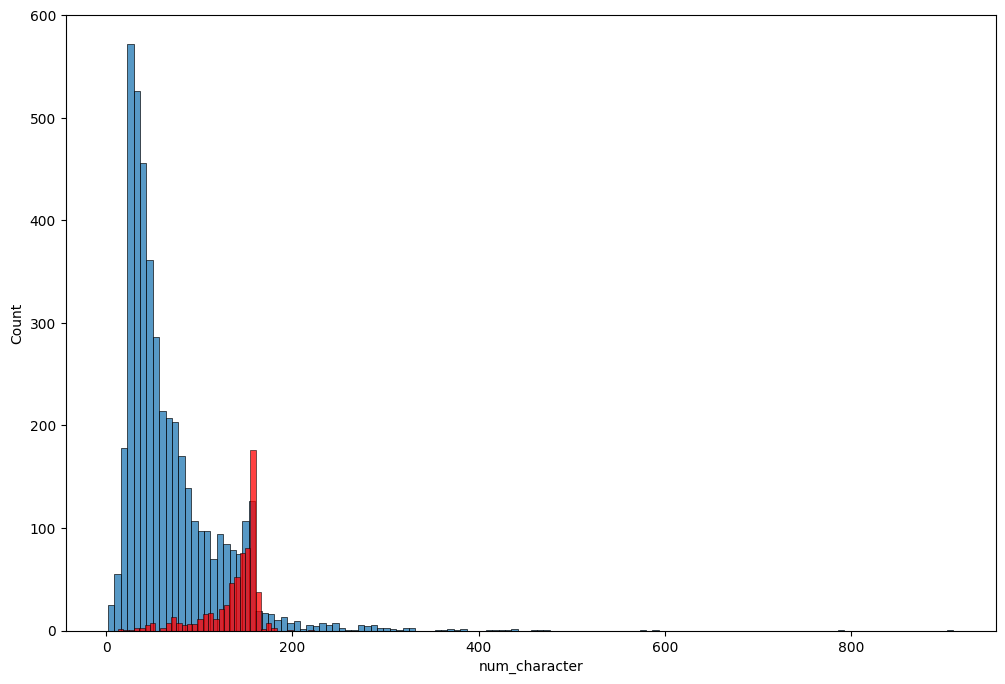

In [32]:
plt.figure(figsize = (12 , 8))
sns.histplot(df[df['type'] == 0] ['num_character'])
sns.histplot(df[df['type'] == 1]['num_character'], color = 'red')
plt.show()

# 3). Data Preprocessing
# lower case
# Tokenization 
# Removing Special character
# Removing stopwords and punctuation

In [33]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [38]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,type,text,num_character,num_word,num_sentence,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [41]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [42]:
spam_wc = wc.generate(df[df['type'] == 1]['transformed_text'].str.cat(sep=" "))

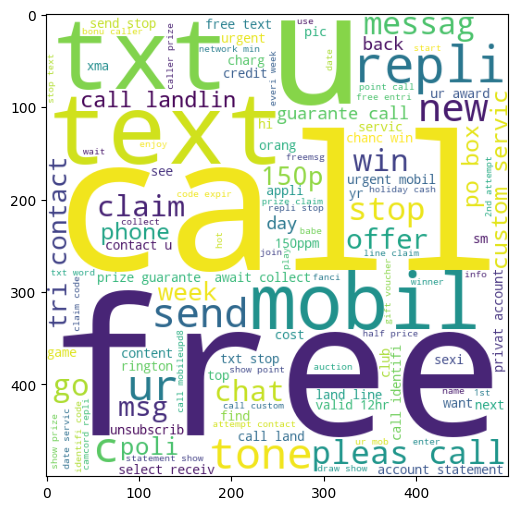

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [44]:
ham_wc = wc.generate(df[df['type'] == 0]['transformed_text'].str.cat(sep=" "))

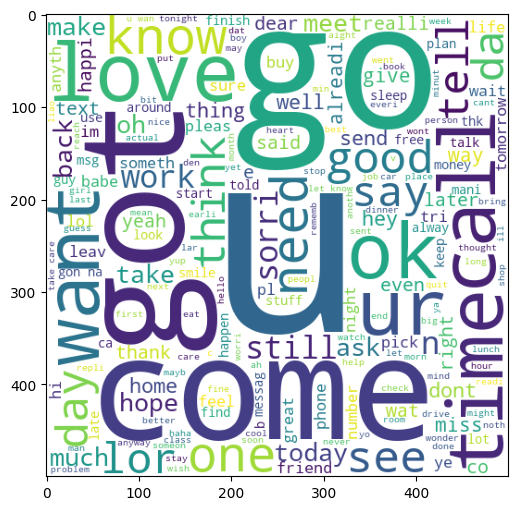

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [46]:
df.head()

,type,text,num_character,num_word,num_sentence,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


In [47]:
spam_corpus = []
for msg in df[df['type'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [48]:
len(spam_corpus)

9978

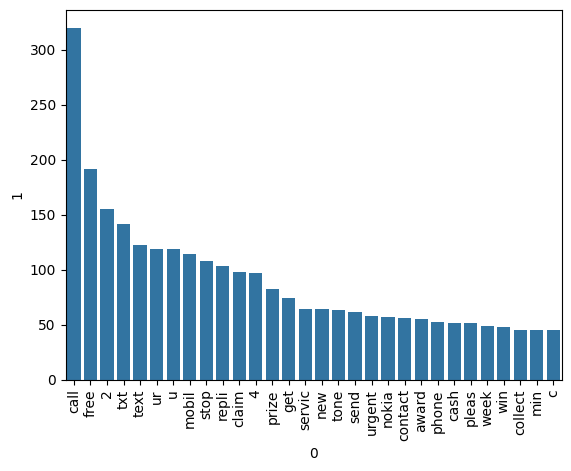

In [49]:
from collections import Counter
temp1 = pd.DataFrame(Counter(spam_corpus).most_common(30))[0]
temp2 = pd.DataFrame(Counter(spam_corpus).most_common(30))[1]

sns.barplot(x = temp1 , y = temp2)
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['type'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35091

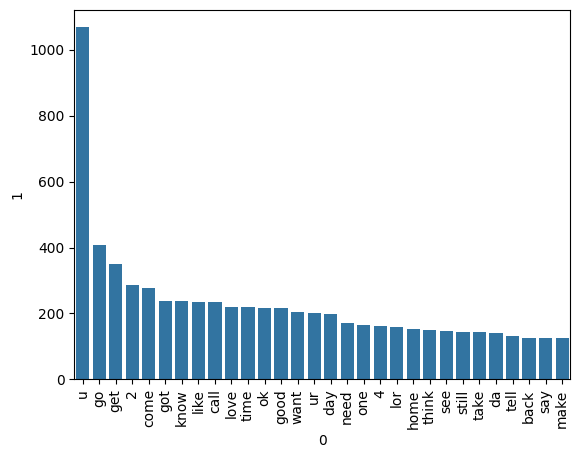

In [52]:
from collections import Counter
temp3 = pd.DataFrame(Counter(ham_corpus).most_common(30))[0]
temp4 = pd.DataFrame(Counter(ham_corpus).most_common(30))[1]

sns.barplot(x = temp3 , y = temp4)
plt.xticks(rotation='vertical')
plt.show()

In [53]:
df.head()

,type,text,num_character,num_word,num_sentence,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,7,1,k give back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,32,3,okmail dear dave final notic collect 4 tenerif...


# 4).Model Building

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [55]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [56]:
x.shape

(5156, 3000)

In [57]:
y = df['type'].values

In [58]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [60]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [61]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(x_train , y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8478682170542635
[[761 135]
 [ 22 114]]
0.4578313253012048


In [63]:
mnb.fit(x_train , y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.9738372093023255
[[894   2]
 [ 25 111]]
0.9823008849557522


In [64]:
model = bnb.fit(x_train , y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9825581395348837
[[895   1]
 [ 17 119]]
0.9916666666666667


In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
svc = SVC(kernel = 'sigmoid')
knc = KNeighborsClassifier()
bnb = BernoulliNB()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : bnb,
    'LR' : lrc,
    'RF' : rfc,
    'DT' : dtc
}

In [68]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9786821705426356, 0.9830508474576272)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9786821705426356
Precision -  0.9830508474576272
For  KN
Accuracy -  0.9031007751937985
Precision -  1.0
For  NB
Accuracy -  0.9825581395348837
Precision -  0.9916666666666667
For  LR
Accuracy -  0.9476744186046512
Precision -  0.9767441860465116
For  RF
Accuracy -  0.9699612403100775
Precision -  1.0
For  DT
Accuracy -  0.9515503875968992
Precision -  0.8359375


In [71]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.903101,1.000000
4,RF,0.969961,1.000000
2,NB,0.982558,0.991667
0,SVC,0.978682,0.983051
3,LR,0.947674,0.976744
5,DT,0.951550,0.835938


In [81]:
input_user_mail = ["Congratulations! You've won a $1000 gift card. Click here to claim your prize now!"]
input_data_features = tfidf.transform(input_user_mail)

prediction = model.predict(input_data_features)

if prediction[0] == 0:
    print("This is a not spam mail")
else:
    print("This is a spam mail")

This is a spam mail


In [82]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl','wb'))
pickle.dump(bnb , open('model.pkl','wb'))